In [0]:
#Fonte: https://dados.gov.br/dataset/painel-de-produtores-de-derivados-producao-de-biocombustiveis
etanol_capacidade_path = '/FileStore/tables/etanol/landing/etanol_capacidade.csv'

In [0]:
from pyspark.sql.types import *

schema_etanol_capacidade = StructType([
    StructField("mes_ano", StringType(), False),
    StructField("razao_social", StringType(), False),
    StructField("cnpj", StringType(), False),
    StructField("cidade", StringType(), False),
    StructField("estado", StringType(), False),
    StructField("regiao", StringType(), False),
    StructField("cap_prod_etanol_anidro_m3_dia", DecimalType(), False),
    StructField("cap_prod_etanol_hidratado_m3_dia", DecimalType(), False)
])
etanol_capacidade_1 = spark.read.schema(schema_etanol_capacidade).csv(etanol_capacidade_path, header=True)
etanol_capacidade_1.show()

+-------+--------------------+--------------+--------------------+------------------+------------+-----------------------------+--------------------------------+
|mes_ano|        razao_social|          cnpj|              cidade|            estado|      regiao|cap_prod_etanol_anidro_m3_dia|cap_prod_etanol_hidratado_m3_dia|
+-------+--------------------+--------------+--------------------+------------------+------------+-----------------------------+--------------------------------+
|01/2018|ABENGOA BIOENERGI...|06252818003446|        PIRASSUNUNGA|         São Paulo|     SUDESTE|                          180|                             200|
|01/2018|ABENGOA BIOENERGI...|06252818003799|SAO JOAO DA BOA V...|         São Paulo|     SUDESTE|                            0|                             600|
|01/2018|ACUCAR E ALCOOL B...|75619056000128|        BANDEIRANTES|            Paraná|         SUL|                          300|                             780|
|01/2018|ACUCAR E ALCOOL O..

In [0]:
etanol_capacidade_2 = etanol_capacidade_1.select("mes_ano", "razao_social", "cidade", "estado", "regiao","cap_prod_etanol_anidro_m3_dia","cap_prod_etanol_hidratado_m3_dia")
etanol_capacidade_2.show()

+-------+--------------------+--------------------+------------------+------------+-----------------------------+--------------------------------+
|mes_ano|        razao_social|              cidade|            estado|      regiao|cap_prod_etanol_anidro_m3_dia|cap_prod_etanol_hidratado_m3_dia|
+-------+--------------------+--------------------+------------------+------------+-----------------------------+--------------------------------+
|01/2018|ABENGOA BIOENERGI...|        PIRASSUNUNGA|         São Paulo|     SUDESTE|                          180|                             200|
|01/2018|ABENGOA BIOENERGI...|SAO JOAO DA BOA V...|         São Paulo|     SUDESTE|                            0|                             600|
|01/2018|ACUCAR E ALCOOL B...|        BANDEIRANTES|            Paraná|         SUL|                          300|                             780|
|01/2018|ACUCAR E ALCOOL O...|              GUAIRA|         São Paulo|     SUDESTE|                          720|     

In [0]:
from pyspark.sql.functions import upper
etanol_capacidade_3 = etanol_capacidade_2.withColumn('estado', upper(etanol_capacidade_2.estado))
etanol_capacidade_3.show()

+-------+--------------------+--------------------+------------------+------------+-----------------------------+--------------------------------+
|mes_ano|        razao_social|              cidade|            estado|      regiao|cap_prod_etanol_anidro_m3_dia|cap_prod_etanol_hidratado_m3_dia|
+-------+--------------------+--------------------+------------------+------------+-----------------------------+--------------------------------+
|01/2018|ABENGOA BIOENERGI...|        PIRASSUNUNGA|         SÃO PAULO|     SUDESTE|                          180|                             200|
|01/2018|ABENGOA BIOENERGI...|SAO JOAO DA BOA V...|         SÃO PAULO|     SUDESTE|                            0|                             600|
|01/2018|ACUCAR E ALCOOL B...|        BANDEIRANTES|            PARANÁ|         SUL|                          300|                             780|
|01/2018|ACUCAR E ALCOOL O...|              GUAIRA|         SÃO PAULO|     SUDESTE|                          720|     

In [0]:
from pyspark.sql.functions import isnan, when, count, col

etanol_capacidade_3.select([count(when(isnan(c), c)).alias(c) for c in etanol_capacidade_3.columns]).show()

+-------+------------+------+------+------+-----------------------------+--------------------------------+
|mes_ano|razao_social|cidade|estado|regiao|cap_prod_etanol_anidro_m3_dia|cap_prod_etanol_hidratado_m3_dia|
+-------+------------+------+------+------+-----------------------------+--------------------------------+
|      0|           0|     0|     0|     0|                            0|                               0|
+-------+------------+------+------+------+-----------------------------+--------------------------------+



In [0]:
etanol_capacidade_3.printSchema()

root
 |-- mes_ano: string (nullable = true)
 |-- razao_social: string (nullable = true)
 |-- cidade: string (nullable = true)
 |-- estado: string (nullable = true)
 |-- regiao: string (nullable = true)
 |-- cap_prod_etanol_anidro_m3_dia: decimal(10,0) (nullable = true)
 |-- cap_prod_etanol_hidratado_m3_dia: decimal(10,0) (nullable = true)



In [0]:
from pyspark.sql.functions import to_date, unix_timestamp

etanol_capacidade_4 = etanol_capacidade_3.withColumn('mes_ano',to_date(unix_timestamp('mes_ano', 'MM/yyyy').cast('timestamp')))

In [0]:
etanol_capacidade_4.show()

+----------+--------------------+--------------------+------------------+------------+-----------------------------+--------------------------------+
|   mes_ano|        razao_social|              cidade|            estado|      regiao|cap_prod_etanol_anidro_m3_dia|cap_prod_etanol_hidratado_m3_dia|
+----------+--------------------+--------------------+------------------+------------+-----------------------------+--------------------------------+
|2018-01-01|ABENGOA BIOENERGI...|        PIRASSUNUNGA|         SÃO PAULO|     SUDESTE|                          180|                             200|
|2018-01-01|ABENGOA BIOENERGI...|SAO JOAO DA BOA V...|         SÃO PAULO|     SUDESTE|                            0|                             600|
|2018-01-01|ACUCAR E ALCOOL B...|        BANDEIRANTES|            PARANÁ|         SUL|                          300|                             780|
|2018-01-01|ACUCAR E ALCOOL O...|              GUAIRA|         SÃO PAULO|     SUDESTE|              

In [0]:
etanol_capacidade_4.write.option('header', 'true').parquet('/FileStore/tables/etanol/processing/etanol_capacidade.parquet')

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
<command-796133019937592> in <module>
----> 1 etanol_capacidade_4.write.option('header', 'true').parquet('/FileStore/tables/etanol/processing/etanol_capacidade.parquet')

/databricks/spark/python/pyspark/sql/readwriter.py in parquet(self, path, mode, partitionBy, compression)
    883             self.partitionBy(partitionBy)
    884         self._set_opts(compression=compression)
--> 885         self._jwrite.parquet(path)
    886 
    887     def text(self, path, compression=None, lineSep=None):

/databricks/spark/python/lib/py4j-0.10.9.1-src.zip/py4j/java_gateway.py in __call__(self, *args)
   1302 
   1303         answer = self.gateway_client.send_command(command)
-> 1304         return_value = get_return_value(
   1305             answer, self.gateway_client, self.target_id, self.name)
   1306 

/databricks/spark/python/pyspark/sql/u

In [0]:
etanol_capacidade_processing_path = '/FileStore/tables/etanol/processing/etanol_capacidade.parquet'
etanol_capacidade_processing = spark.read.parquet(etanol_capacidade_processing_path)
etanol_capacidade_processing.show()

+----------+--------------------+--------------------+------------------+------------+-----------------------------+--------------------------------+
|   mes_ano|        razao_social|              cidade|            estado|      regiao|cap_prod_etanol_anidro_m3_dia|cap_prod_etanol_hidratado_m3_dia|
+----------+--------------------+--------------------+------------------+------------+-----------------------------+--------------------------------+
|2018-01-01|ABENGOA BIOENERGI...|        PIRASSUNUNGA|         SÃO PAULO|     SUDESTE|                          180|                             200|
|2018-01-01|ABENGOA BIOENERGI...|SAO JOAO DA BOA V...|         SÃO PAULO|     SUDESTE|                            0|                             600|
|2018-01-01|ACUCAR E ALCOOL B...|        BANDEIRANTES|            PARANÁ|         SUL|                          300|                             780|
|2018-01-01|ACUCAR E ALCOOL O...|              GUAIRA|         SÃO PAULO|     SUDESTE|              

In [0]:
etanol_capacidade_processing.createOrReplaceTempView("etanol_capacidadeView")

In [0]:
capacidade_mes = spark.sql("SELECT mes_ano, SUM(cap_prod_etanol_anidro_m3_dia) + SUM(cap_prod_etanol_hidratado_m3_dia) as cap_prod_etanol FROM etanol_capacidadeView group by mes_ano order by mes_ano")
display(capacidade_mes)

mes_ano,cap_prod_etanol
2018-01-01,360070
2018-02-01,363450
2018-03-01,365915
2018-04-01,366865
2018-05-01,367575
2018-06-01,369035
2018-07-01,368011
2018-08-01,367229
2018-09-01,367355
2018-10-01,364729


In [0]:
capacidade_regiao = spark.sql("SELECT mes_ano, regiao, SUM(cap_prod_etanol_anidro_m3_dia) + SUM(cap_prod_etanol_hidratado_m3_dia) as cap_prod_etanol FROM etanol_capacidadeView group by mes_ano, regiao order by mes_ano desc, cap_prod_etanol desc limit 5")
display(capacidade_regiao)

mes_ano,regiao,cap_prod_etanol
2021-11-01,SUDESTE,210708
2021-11-01,CENTRO OESTE,114896
2021-11-01,NORDESTE,27560
2021-11-01,SUL,20234
2021-11-01,NORTE,3840


In [0]:
capacidade_mes_sudeste = spark.sql("SELECT mes_ano, SUM(cap_prod_etanol_anidro_m3_dia) + SUM(cap_prod_etanol_hidratado_m3_dia) as cap_prod_etanol FROM etanol_capacidadeView WHERE regiao = 'SUDESTE' group by mes_ano order by mes_ano")
display(capacidade_mes_sudeste)

mes_ano,cap_prod_etanol
2018-01-01,205318
2018-02-01,209398
2018-03-01,211276
2018-04-01,211276
2018-05-01,211911
2018-06-01,213371
2018-07-01,213761
2018-08-01,212399
2018-09-01,212439
2018-10-01,209899


In [0]:
capacidade_mes_centroeste = spark.sql("SELECT mes_ano, SUM(cap_prod_etanol_anidro_m3_dia) + SUM(cap_prod_etanol_hidratado_m3_dia) as cap_prod_etanol FROM etanol_capacidadeView WHERE regiao = 'CENTRO OESTE' group by mes_ano order by mes_ano")
display(capacidade_mes_centroeste)

mes_ano,cap_prod_etanol
2018-01-01,97694
2018-02-01,97514
2018-03-01,97714
2018-04-01,98664
2018-05-01,98739
2018-06-01,98739
2018-07-01,97845
2018-08-01,98425
2018-09-01,98548
2018-10-01,98548


In [0]:
capacidade_mes_nordeste = spark.sql("SELECT mes_ano, SUM(cap_prod_etanol_anidro_m3_dia) + SUM(cap_prod_etanol_hidratado_m3_dia) as cap_prod_etanol FROM etanol_capacidadeView WHERE regiao = 'NORDESTE' group by mes_ano order by mes_ano")
display(capacidade_mes_nordeste)

mes_ano,cap_prod_etanol
2018-01-01,31406
2018-02-01,31706
2018-03-01,32093
2018-04-01,32093
2018-05-01,32093
2018-06-01,32093
2018-07-01,31573
2018-08-01,31573
2018-09-01,31536
2018-10-01,31450


In [0]:
capacidade_mes_sul = spark.sql("SELECT mes_ano, SUM(cap_prod_etanol_anidro_m3_dia) + SUM(cap_prod_etanol_hidratado_m3_dia) as cap_prod_etanol FROM etanol_capacidadeView WHERE regiao = 'SUL' group by mes_ano order by mes_ano")
display(capacidade_mes_sul)

mes_ano,cap_prod_etanol
2018-01-01,21962
2018-02-01,21142
2018-03-01,21142
2018-04-01,21142
2018-05-01,21142
2018-06-01,21142
2018-07-01,21142
2018-08-01,21142
2018-09-01,21142
2018-10-01,21142


In [0]:
capacidade_mes_norte = spark.sql("SELECT mes_ano, SUM(cap_prod_etanol_anidro_m3_dia) + SUM(cap_prod_etanol_hidratado_m3_dia) as cap_prod_etanol FROM etanol_capacidadeView WHERE regiao = 'NORTE' group by mes_ano order by mes_ano")
display(capacidade_mes_norte)

mes_ano,cap_prod_etanol
2018-01-01,3690
2018-02-01,3690
2018-03-01,3690
2018-04-01,3690
2018-05-01,3690
2018-06-01,3690
2018-07-01,3690
2018-08-01,3690
2018-09-01,3690
2018-10-01,3690


In [0]:
qtd_razao_social_mes = spark.sql("SELECT mes_ano, COUNT(razao_social) FROM etanol_capacidadeView group by mes_ano order by mes_ano")
display(qtd_razao_social_mes)

mes_ano,count(razao_social)
2018-01-01,384
2018-02-01,382
2018-03-01,382
2018-04-01,382
2018-05-01,383
2018-06-01,383
2018-07-01,381
2018-08-01,378
2018-09-01,378
2018-10-01,372


In [0]:
qtd_razao_social_mes_sudeste = spark.sql("SELECT mes_ano, COUNT(razao_social) FROM etanol_capacidadeView WHERE regiao = 'SUDESTE' group by mes_ano order by mes_ano")
display(qtd_razao_social_mes_sudeste)

mes_ano,count(razao_social)
2018-01-01,209
2018-02-01,209
2018-03-01,209
2018-04-01,209
2018-05-01,209
2018-06-01,209
2018-07-01,209
2018-08-01,206
2018-09-01,206
2018-10-01,201


In [0]:
qtd_razao_social_mes_centroeste = spark.sql("SELECT mes_ano, COUNT(razao_social) FROM etanol_capacidadeView WHERE regiao = 'CENTRO OESTE' group by mes_ano order by mes_ano")
display(qtd_razao_social_mes_centroeste)

mes_ano,count(razao_social)
2018-01-01,74
2018-02-01,74
2018-03-01,74
2018-04-01,74
2018-05-01,75
2018-06-01,75
2018-07-01,75
2018-08-01,75
2018-09-01,75
2018-10-01,75


In [0]:
qtd_cidade_mes = spark.sql("SELECT mes_ano, COUNT(DISTINCT(cidade)) FROM etanol_capacidadeView group by mes_ano order by mes_ano")
display(qtd_cidade_mes)

mes_ano,count(DISTINCT cidade)
2018-01-01,324
2018-02-01,322
2018-03-01,322
2018-04-01,322
2018-05-01,323
2018-06-01,323
2018-07-01,321
2018-08-01,319
2018-09-01,319
2018-10-01,313


In [0]:
qtd_cidade_mes_regiao = spark.sql("SELECT mes_ano, regiao, COUNT(DISTINCT(cidade)) as n_cidades FROM etanol_capacidadeView group by mes_ano, regiao order by mes_ano desc, n_cidades desc limit 5")
display(qtd_cidade_mes_regiao)

mes_ano,regiao,n_cidades
2021-11-01,SUDESTE,158
2021-11-01,CENTRO OESTE,66
2021-11-01,NORDESTE,46
2021-11-01,SUL,26
2021-11-01,NORTE,5


In [0]:
maior_capacidade_2021 = spark.sql("SELECT mes_ano, razao_social, cidade, regiao, SUM(cap_prod_etanol_anidro_m3_dia) + SUM(cap_prod_etanol_hidratado_m3_dia) as cap_prod_etanol FROM etanol_capacidadeView group by mes_ano, razao_social, cidade, regiao order by mes_ano desc, cap_prod_etanol desc limit 5")
display(maior_capacidade_2021)

mes_ano,razao_social,cidade,regiao,cap_prod_etanol
2021-11-01,INPASA AGROINDUSTRIAL S/A,SINOP,CENTRO OESTE,6000
2021-11-01,FS AGRISOLUTIONS INDUSTRIA DE BIOCOMBUSTIVEIS LTDA,SORRISO,CENTRO OESTE,5100
2021-11-01,RAIZEN ENERGIA S.A,BARRA BONITA,SUDESTE,3910
2021-11-01,SAO MARTINHO S/A,PRADOPOLIS,SUDESTE,3890
2021-11-01,BIOSEV S.A.,RIO BRILHANTE,CENTRO OESTE,3800


In [0]:
maior_capacidade_2018 = spark.sql("SELECT mes_ano, razao_social, cidade, regiao, SUM(cap_prod_etanol_anidro_m3_dia) + SUM(cap_prod_etanol_hidratado_m3_dia) as cap_prod_etanol FROM etanol_capacidadeView group by mes_ano, razao_social, cidade, regiao order by mes_ano, cap_prod_etanol desc limit 5")
display(maior_capacidade_2018)

mes_ano,razao_social,cidade,regiao,cap_prod_etanol
2018-01-01,SAO MARTINHO S/A,PRADOPOLIS,SUDESTE,3890
2018-01-01,TROPICAL BIOENERGIA S.A.,EDEIA,CENTRO OESTE,3700
2018-01-01,BIOSEV S.A.,RIO BRILHANTE,CENTRO OESTE,3650
2018-01-01,RAIZEN CAARAPO ACUCAR E ALCOOL LTDA,CAARAPO,CENTRO OESTE,3640
2018-01-01,AGRO ENERGIA SANTA LUZIA S.A. - EM RECUPERACAO JUDICIAL,NOVA ALVORADA DO SUL,CENTRO OESTE,3600


In [0]:
capacidade_mes.write.option('header', 'true').parquet('/FileStore/tables/etanol/curated/capacidade_mes2.parquet')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [0]:
dataset_path = '/FileStore/tables/etanol/curated/capacidade_mes2.parquet'
dataset = spark.read.parquet(dataset_path)
dataset = dataset.toPandas()

/databricks/spark/python/pyspark/sql/pandas/utils.py:79: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [cap_prod_etanol] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


In [0]:
time_series = dataset.set_index(['mes_ano'])
time_series.index = pd.to_datetime(time_series.index)
time_series

,cap_prod_etanol
mes_ano,
2018-01-01,360070
2018-02-01,363450
2018-03-01,365915
2018-04-01,366865
2018-05-01,367575
2018-06-01,369035
2018-07-01,368011
2018-08-01,367229
2018-09-01,367355


Out[10]: [<matplotlib.lines.Line2D at 0x7f99346f2820>]

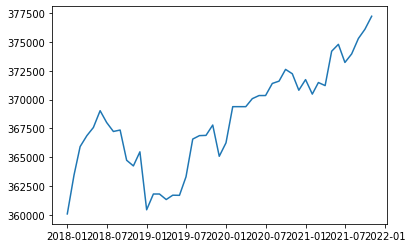

In [0]:
plt.plot(time_series)

In [0]:
model = ExponentialSmoothing(endog = time_series.cap_prod_etanol.astype(float),
                             trend = "add",
                             seasonal = "add",
                             seasonal_periods = 9).fit()
predictions = model.forecast(steps = 12)
predictions

/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
Out[11]: 2021-12-01    376705.241221
2022-01-01    376492.451515
2022-02-01    378636.479113
2022-03-01    378973.637069
2022-04-01    379278.886400
2022-05-01    380538.893819
2022-06-01    380696.315882
2022-07-01    379813.500411
2022-08-01    377615.216174
2022-09-01    378180.724535
2022-10-01    377967.934829
2022-11-01    380111.962427
Freq: MS, dtype: float64

Out[12]: [<matplotlib.lines.Line2D at 0x7f993456a250>]

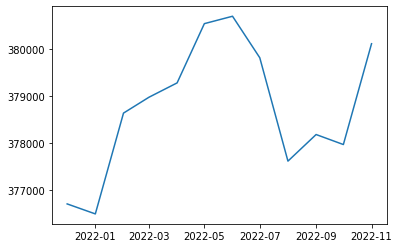

In [0]:
plt.plot(predictions)

Out[13]: <AxesSubplot:xlabel='mes_ano'>

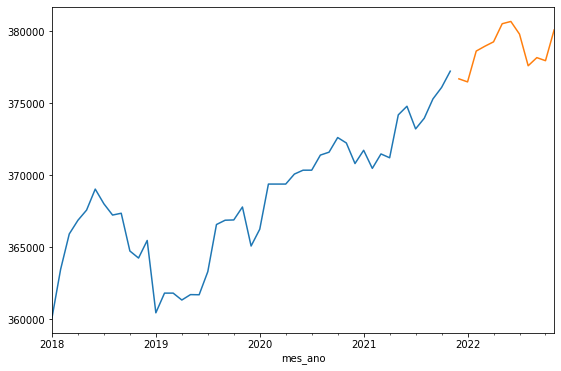

In [0]:
time_series['cap_prod_etanol']['2018-01-01':].astype(float).plot(figsize = (9,6))
predictions.plot()

In [0]:
len(time_series)

Out[14]: 47

In [0]:
train = time_series[:30]
train.shape

Out[15]: (30, 1)

In [0]:
train.index.min(), train.index.max()

Out[16]: (Timestamp('2018-01-01 00:00:00'), Timestamp('2020-06-01 00:00:00'))

In [0]:
test = time_series[30:]
test.shape

Out[17]: (17, 1)

In [0]:
test.index.min(), test.index.max()

Out[18]: (Timestamp('2020-07-01 00:00:00'), Timestamp('2021-11-01 00:00:00'))

In [0]:
model2 = ExponentialSmoothing(endog = train.cap_prod_etanol.astype(float),
                             trend = "add",
                             seasonal = "add",
                             seasonal_periods = 9).fit()
predictions = pd.DataFrame(model2.forecast(steps = 17), index=test.index)
predictions.columns = ['cap_prod_etanol']

/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


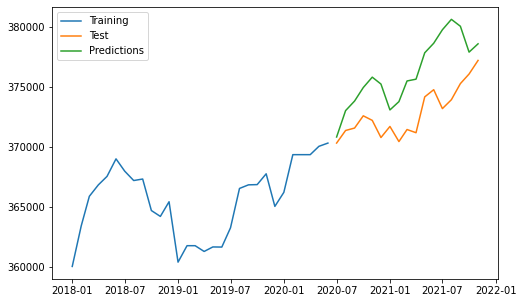

In [0]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(predictions, label = 'Predictions')
plt.legend();